In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [44]:
training_data = torchvision.datasets.FashionMNIST(
    root="data",
    download=True,
    train=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Resize((227, 227))])
)


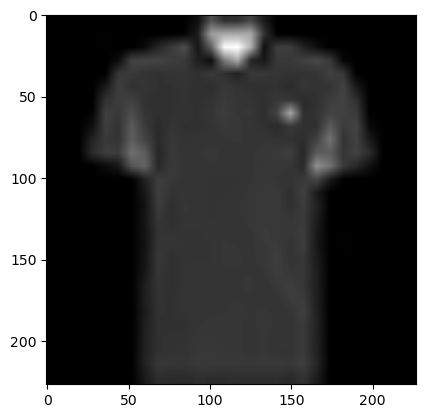

In [70]:
plt.imshow(training_data[202][0].squeeze(), cmap='gray') # verifying images

In [12]:
dl = DataLoader(training_data, 100)

In [35]:
class Anet(nn.Module):
    def __init__(self):
        super(Anet, self).__init__()
        self.L1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=5, stride=2, padding=4),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
        )
        self.L2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
        )
        self.L3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, padding=2),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )
        self.L4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, padding=2),
            nn.BatchNorm2d(384),
            nn.ReLU()
        )
        self.L5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(3, 2)
        )
        self.L6 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(65536, 4096),
            nn.ReLU()
        )
        self.L7 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU()
        )
        self.L8 = nn.Sequential(
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        x = self.L1(x)
        x = self.L2(x)
        x = self.L3(x)
        x = self.L4(x)
        x = self.L5(x)
        x = x.reshape(x.size(0), -1)
        x = self.L6(x)
        x = self.L7(x)
        x = self.L8(x)
        return x

In [24]:
def train(dl, f, n_epochs):
  opt = SGD(f.parameters(), lr=0.01)
  L = nn.CrossEntropyLoss()
  losses = []
  epochs = []
  for epoch in range(n_epochs):
    N = len(dl)
    for i, (x, y) in enumerate(dl):
      print("Batch: ",i)
      opt.zero_grad()
      loss_val = L(f(x), y)
      loss_val.backward()
      opt.step()
      epochs.append(epoch+i/N)
      losses.append(loss_val.item())
  return np.array(epochs), np.array(losses) 

In [49]:
net = Anet()

In [ ]:
e, l = train(dl, net, 1)

tensor([[-0.2580,  0.1794, -0.1173,  0.3611, -0.0258,  0.1802, -0.2871, -0.9350,
         -1.2183,  0.1044]], grad_fn=<AddmmBackward0>)


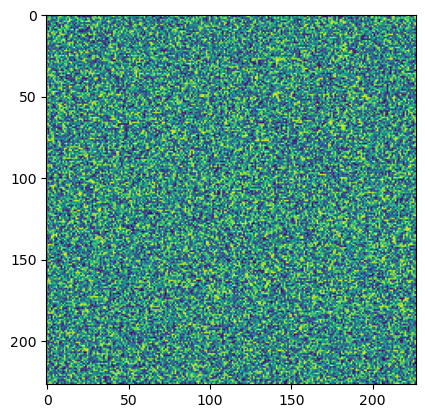

In [73]:
x = torch.rand((1,1,227,227))
for i in x:
    plt.imshow(i.squeeze())
print(net(x)) #Just seeing if it works